### Introduction :

Le problème est un exemple de classification binaire supervisée, où l'objectif est de prédire si une transaction est frauduleuse ou non en utilisant les données d'entrée disponibles dans le dataset.

Les techniques de classification machine learning et deep learning suivantes peuvent être utilisées pour résoudre ce problème :

1- Régression logistique : cette technique est une méthode de classification binaire qui est efficace pour des ensembles de données relativement petits.

2- K plus proches voisins (K-NN) : cette technique est efficace pour les ensembles de données avec un grand nombre de variables d'entrée et un faible nombre de données d'entraînement.

3- SVM (Support Vector Machine) : cette technique est efficace pour les ensembles de données avec des variables d'entrée non linéaires et une grande dimensionnalité.

4- Réseaux de neurones artificiels (ANN) : cette technique est efficace pour les ensembles de données complexes avec un grand nombre de variables d'entrée et une grande quantité de données d'entraînement.

5- Réseaux de neurones récurrents (RNN) : cette technique est efficace pour les ensembles de données avec des séquences de données en entrée, comme les transactions bancaires.




- courbe ROC

    La courbe ROC (Receiver Operating Characteristic) est une courbe qui représente la performance d'un modèle de classification binaire en fonction de son seuil de classification. Elle trace le taux de vrais positifs (sensibilité) en fonction du taux de faux positifs (1 - spécificité) pour différents seuils de classification.

    La courbe ROC est souvent utilisée pour évaluer la performance d'un modèle de classification binaire en comparant plusieurs modèles ou en sélectionnant le seuil de classification optimal pour un modèle donné. Plus la courbe ROC se rapproche du coin supérieur gauche du graphique, plus le modèle est considéré comme performant.

    La surface sous la courbe ROC (Aire sous la courbe ROC ou AUC en anglais) est un autre métrique de performance couramment utilisée. L'AUC mesure la capacité du modèle à distinguer les classes positives des classes négatives. Une AUC de 1.0 indique que le modèle est parfaitement capable de distinguer les classes, tandis qu'une AUC de 0.5 indique que le modèle est incapable de faire mieux que le hasard.

In [11]:
# pour reduir la quantite du code on definit la fct ROC_curve() pour tracer la courbe roc pour un modele

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix

def ROC_curve(y_test,y_pred):
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    plt.plot([0, 1],[0, 1],'--')
    plt.plot(fpr,tpr,label='linear regression')
    plt.xlabel('faux positifs')
    plt.ylabel('vrais positifs')
    plt.show()


def matrice_confusion(y_test, y_pred):
    # Créer une matrice de confusion
    confusion = confusion_matrix(y_test, y_pred)
    print(confusion)
    # Afficher la matrice de confusion
    labels = ['Classe 0', 'Classe 1']
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion)
    plt.title('Matrice de confusion')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Prédictions')
    plt.ylabel('Classes réelles')
    plt.show()

from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,mean_squared_error

def metrique(y_test, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall = tp / (tp + fn)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    accuracy=accuracy_score(y_test, y_pred)

    print("Precision : ",accuracy)
    print("Rappel : ",recall)
    print("Specificite : ",specificity)
    print("F1 : ",f1)
    print("Auc_roc : ",auc_roc)

    
    

### 1- Régression logistique :


accuracy 0.9991222218320986


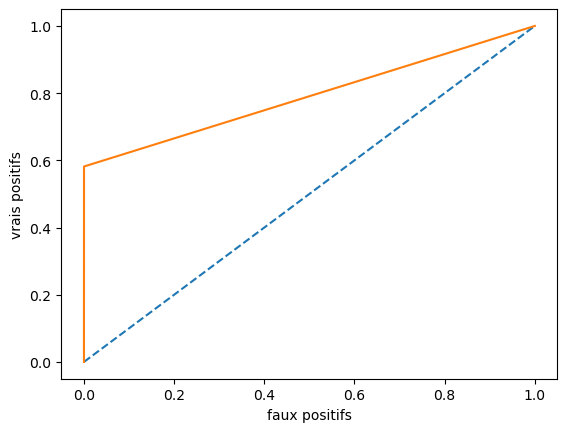

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Charger les données
data = pd.read_csv('creditcard.csv')
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict values for the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
rlog_accuracy=accuracy_score(y_test, y_pred)
print('accuracy',rlog_accuracy)
#courbe ROC
ROC_curve(y_test,y_pred)



In [13]:
matrice_confusion(y_test, y_pred)

array([[56855,     9],
       [   41,    57]])

In [14]:
metrique(y_test, y_pred)

Precision :  0.9991222218320986
Rappel :  0.5816326530612245
Specificite :  0.9998417276308385
F1 :  0.6951219512195121
Auc_roc :  0.7907371903460314


### 2- K plus proches voisins (K-NN) :


- Le choix de la valeur de k dépend de la taille  de données et de la complexité du problème. on commence par des valeurs de k plus petites,  et on augmente progressivement la valeur de k jusqu'à ce qu'on trouve la meilleure valeur pour votre ensemble de données.
Dans notre cas, avec plus de 284000 transactions bancaires, on peur commencer par des valeurs de k plus grandes, telles que k = 25 et ajuster en fonction de la précision et des performances de votre modèle.
- On utilisé la méthode  recherche de grille (GridSearchCV)  pour déterminer la meilleure valeur de k .

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Reshape the training data to 2D format
X_train=X_train.values # Convert the DataFrame to a NumPy array
X_train_2d = X_train.reshape(X_train.shape[0], -1)

# Define the parameter grid for k
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]} #, 11, 13, 15,25,30

# Create a KNN model
knn = KNeighborsClassifier()

# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_2d, y_train)

# Print the best parameter value
k=grid_search.best_params_['n_neighbors']
print("Best k value:", k)
# Reshape the test data to 2D format
X_test=X_test.values # Convert the DataFrame to a NumPy array

X_test_2d = X_test.reshape(X_test.shape[0], -1)

# Get the best model and use it to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_2d)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Best k value: 3
Accuracy: 0.9984375548611355


accuracy 0.9984375548611355


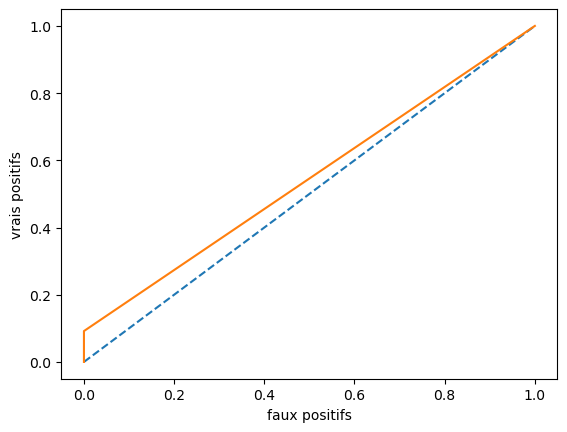

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Créer le modèle K-NN avec best k (3)
model = KNeighborsClassifier(n_neighbors=k)

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
knn_accuracy=accuracy_score(y_test, y_pred)
print('accuracy',knn_accuracy)
#courbe ROC
ROC_curve(y_test,y_pred)

[[56864     0]
 [   89     9]]


/tmp/ipykernel_7367/2668435628.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_7367/2668435628.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


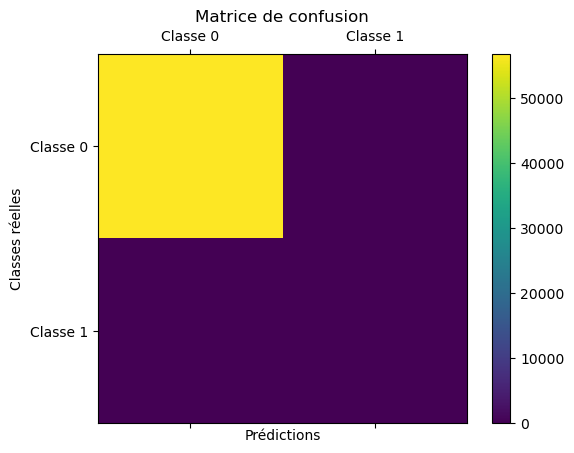

In [17]:
matrice_confusion(y_test,y_pred)

In [18]:
metrique(y_test,y_pred)

Precision :  0.9984375548611355
Rappel :  0.09183673469387756
Specificite :  1.0
F1 :  0.16822429906542058
Auc_roc :  0.5459183673469388


### 3- SVM (Support Vector Machine) :


accuracy 0.9984551104244935


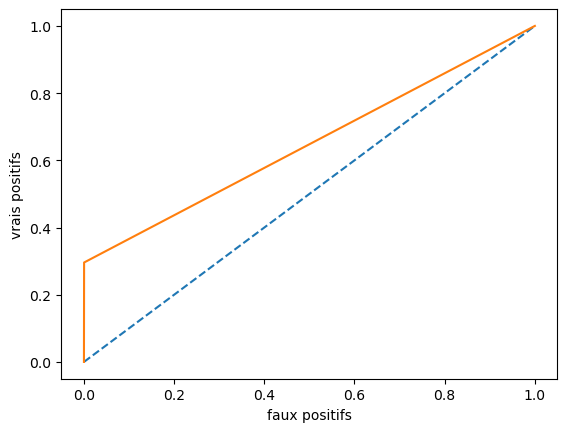

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Créer le modèle SVM avec un noyau linéaire
model = SVC(kernel='linear')

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédire les valeurs pour l'ensemble de test
y_pred = model.predict(X_test)

# Évaluer les performances du modèle
svm_accuracy=accuracy_score(y_test, y_pred)
print('accuracy',svm_accuracy)
#courbe ROC
ROC_curve(y_test,y_pred)


[[56845    19]
 [   69    29]]


/tmp/ipykernel_7367/2668435628.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_7367/2668435628.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


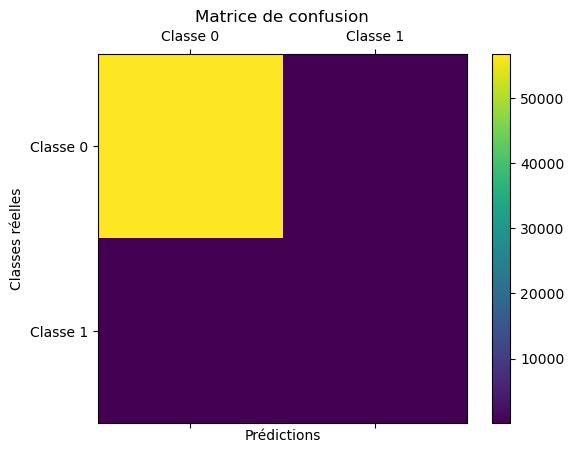

In [20]:
matrice_confusion(y_test,y_pred)

In [21]:
metrique(y_test, y_pred)

Precision :  0.9984551104244935
Rappel :  0.29591836734693877
Specificite :  0.9996658694428813
F1 :  0.3972602739726027
Auc_roc :  0.64779211839491


L'algorithme de SVM est lourd en effet, il prend beaucoup plus du temps par rapport au autres algorithmes de classification


### 4- Réseau de neurones

2023-03-20 06:05:32.437331: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 06:05:32.779547: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-20 06:05:32.827507: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-20 06:05:32.827529: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

Epoch 1/10
7121/7121 [==============================] - 15s 2ms/step - loss: 26.2738 - accuracy: 0.9952
Epoch 2/10
7121/7121 [==============================] - 15s 2ms/step - loss: 12.0037 - accuracy: 0.9962
Epoch 3/10
7121/7121 [==============================] - 15s 2ms/step - loss: 8.4412 - accuracy: 0.9962
Epoch 4/10
7121/7121 [==============================] - 16s 2ms/step - loss: 6.7153 - accuracy: 0.9964
Epoch 5/10
7121/7121 [==============================] - 15s 2ms/step - loss: 4.5064 - accuracy: 0.9964
Epoch 6/10
7121/7121 [==============================] - 14s 2ms/step - loss: 4.9896 - accuracy: 0.9966
Epoch 7/10
7121/7121 [==============================] - 15s 2ms/step - loss: 2.9884 - accuracy: 0.9967
Epoch 8/10
7121/7121 [==============================] - 14s 2ms/step - loss: 2.7431 - accuracy: 0.9970
Epoch 9/10
7121/7121 [==============================] - 14s 2ms/step - loss: 1.9593 - accuracy: 0.9972
Epoch 10/10
1781/1781 [==============================] - 5s 2ms/step - 

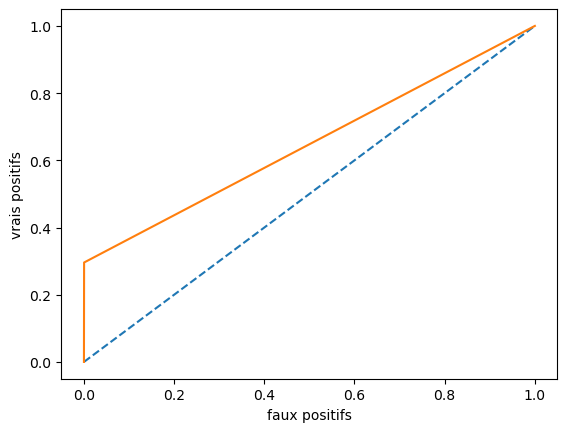

In [22]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Créer le modèle de réseau de neurones
model = tf.keras.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(30,)),
  tf.keras.layers.Dense(2, activation='softmax')
])

# Compiler le modèle avec une fonction de perte, un optimiseur et une métrique
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Évaluer les performances du modèle sur l'ensemble de test
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
rn_accuracy=accuracy_score(y_test, y_pred)
print('accuracy',rn_accuracy)
#courbe ROC
ROC_curve(y_test,y_pred)


[[56845    19]
 [   69    29]]


/tmp/ipykernel_7367/2668435628.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_7367/2668435628.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


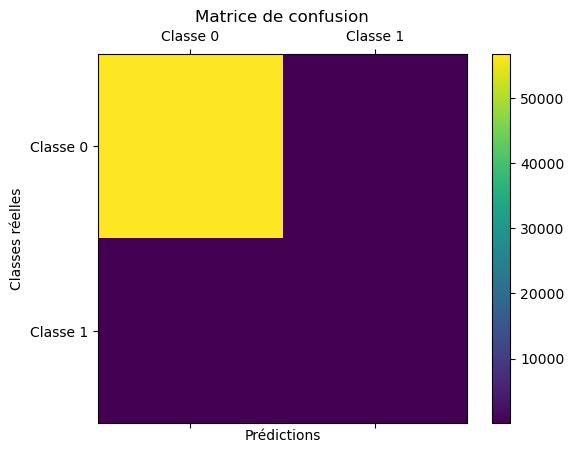

In [23]:
matrice_confusion(y_test,y_pred)

In [24]:
metrique(y_test, y_pred)

Precision :  0.9984551104244935
Rappel :  0.29591836734693877
Specificite :  0.9996658694428813
F1 :  0.3972602739726027
Auc_roc :  0.64779211839491


Cet exemple de code utilise TensorFlow pour construire un réseau de neurones à une couche cachée avec 64 neurones, une fonction d'activation ReLU et une couche de sortie de 2 neurones avec une fonction d'activation softmax pour la classification. La fonction de perte utilisée est la "sparse categorical crossentropy" qui est appropriée pour la classification avec deux classes. L'optimiseur utilisé est l'optimiseur Adam. Le modèle est entraîné sur l'ensemble d'entraînement avec 10 époques et une taille de lot de 32. Enfin, les performances du modèle sont évaluées sur l'ensemble de test et le score d'exactitude est affiché.

### 5- Réseau de neurones récurrents (RNN) LSTM
L'utilisation d'un réseau de neurones récurrents (RNN) peut être appropriée pour certains types de données séquentielles, tels que les séquences temporelles. Dans le cas des transactions bancaires, l'ordre temporel des transactions peut être important pour détecter la fraude.



Epoch 1/10
7121/7121 [==============================] - 15s 2ms/step - loss: 5.2396 - accuracy: 0.9969
Epoch 2/10
7121/7121 [==============================] - 13s 2ms/step - loss: 0.3231 - accuracy: 0.9976
Epoch 3/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0566 - accuracy: 0.9980
Epoch 4/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0224 - accuracy: 0.9983
Epoch 5/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0371 - accuracy: 0.9983
Epoch 6/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0146 - accuracy: 0.9983
Epoch 7/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0264 - accuracy: 0.9983
Epoch 8/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.0247 - accuracy: 0.9983
Epoch 9/10
7121/7121 [==============================] - 16s 2ms/step - loss: 0.1427 - accuracy: 0.9983
Epoch 10/10
1781/1781 [==============================] - 3s 2ms/step - lo

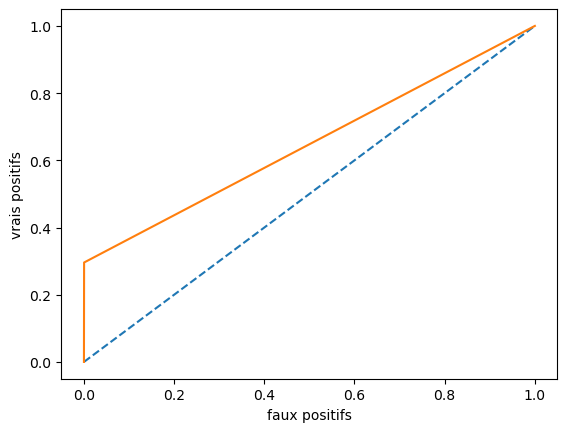

In [26]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Préparer les données en ajoutant une dimension pour le temps

X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Créer le modèle LSTM

model = tf.keras.Sequential([
  tf.keras.layers.LSTM(64, activation='relu', input_shape=(1, 30)),
  tf.keras.layers.Dense(2, activation='softmax')
])

# Compiler le modèle avec une fonction de perte, un optimiseur et une métrique
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Entraîner le modèle sur l'ensemble d'entraînement

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
# Évaluer les performances du modèle sur l'ensemble de test

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
rnn_accuracy=accuracy_score(y_test, y_pred)
print('accuracy',rlog_accuracy)
#courbe ROC

ROC_curve(y_test,y_pred)

[[56845    19]
 [   69    29]]


/tmp/ipykernel_7367/2668435628.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
/tmp/ipykernel_7367/2668435628.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


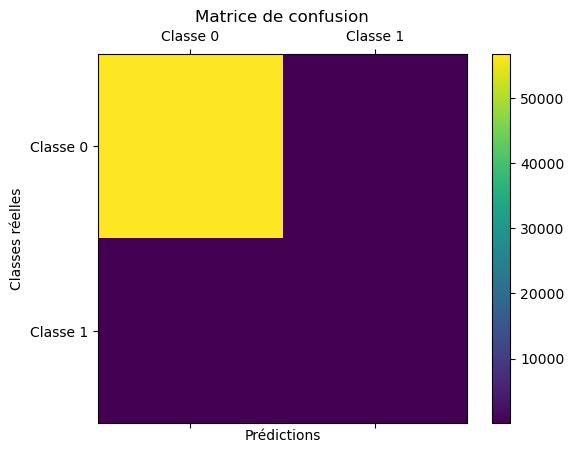

In [27]:
matrice_confusion(y_test,y_pred)

In [28]:
metrique(y_test, y_pred)

Precision :  0.9984551104244935
Rappel :  0.29591836734693877
Specificite :  0.9996658694428813
F1 :  0.3972602739726027
Auc_roc :  0.64779211839491


In [29]:
print('regression logistique accuracy : ',rlog_accuracy)
print('k-plus proche voisin accuracy : ',knn_accuracy)
print('svm accuracy : ',rlog_accuracy)
print('reseaux de neurones accuracy : ',rn_accuracy)
print('reseaux de neurones recurrents accuracy : ',rnn_accuracy)


regression logistique accuracy :  0.9991222218320986
k-plus proche voisin accuracy :  0.9984375548611355
svm accuracy :  0.9991222218320986
reseaux de neurones accuracy :  0.9984551104244935
reseaux de neurones recurrents accuracy :  0.9984551104244935


- On remarque que la regression logistique et SVM donne le meilleure score de précision que les reseaux de neurones  et le k-plus proche voisin
- SVM prend plus de ressource et de temps donc on peut dire que la regression lineaire est la plus pertinent pour ce probleme de classification